# 피파 이적료 예측

## 패키지 

In [1]:
import pandas as pd
import numpy as np 
from scipy.stats import norm,skew
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('FIFA_train.csv',encoding='UTF-8')
test = pd.read_csv('FIFA_test.csv',encoding='UTF-8')
submission = pd.read_csv('FIFA_sub.csv',encoding='UTF-8')

In [3]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [4]:
test.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


## 결측치 확인 

In [5]:
train.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [6]:
test.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
dtype: int64

### 기술통계

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [8]:
num_col = ['age','stat_overall','stat_potential']
cat_col = ['continent','reputation','contract_until','position','prefer_foot','stat_skill_moves']

In [9]:
train.loc[:,cat_col]

,continent,reputation,contract_until,position,prefer_foot,stat_skill_moves
0,south america,5.0,2021,ST,left,4.0
1,europe,4.0,2020,GK,right,1.0
2,south america,5.0,2021,ST,right,3.0
3,europe,4.0,2020,DF,right,3.0
4,europe,3.0,2021,GK,right,1.0
...,...,...,...,...,...,...
8927,africa,1.0,2019,MF,right,3.0
8928,europe,1.0,2020,DF,right,2.0
8929,south america,1.0,2021,DF,right,2.0
8930,europe,1.0,2021,GK,right,1.0


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   int64  
 3   continent         3828 non-null   object 
 4   contract_until    3828 non-null   object 
 5   position          3828 non-null   object 
 6   prefer_foot       3828 non-null   object 
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   int64  
 9   stat_potential    3828 non-null   int64  
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 329.1+ KB


In [11]:
train.loc[:,num_col].describe()

,age,stat_overall,stat_potential
count,8932.000000,8932.000000,8932.000000
mean,25.209136,67.091133,71.997201
std,4.635515,6.854910,5.988147
min,16.000000,47.000000,48.000000
25%,21.000000,63.000000,68.000000
50%,25.000000,67.000000,72.000000
75%,28.000000,72.000000,76.000000
max,40.000000,94.000000,94.000000


In [12]:
train.loc[:,cat_col].describe(include="object")

,continent,contract_until,position,prefer_foot
count,8932,8932,8932,8932
unique,5,17,4,2
top,europe,2019,MF,right
freq,5322,2366,3428,6837


In [13]:
train.loc[:,'continent'].value_counts()

continent
europe           5322
south america    1927
asia              787
africa            721
oceania           175
Name: count, dtype: int64

In [14]:
train.loc[:,'position'].value_counts()

position
MF    3428
DF    2791
ST    1705
GK    1008
Name: count, dtype: int64

In [15]:
train.loc[:,'contract_until'].value_counts()

contract_until
2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: count, dtype: int64

In [16]:
train.loc[:,'prefer_foot'].value_counts()

prefer_foot
right    6837
left     2095
Name: count, dtype: int64

### 필요없는 열 제거 



In [17]:
train = train.drop(['name','id'],axis=1)
test = test.drop(['name','id'],axis=1)



In [18]:
train.columns

Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
       'value'],
      dtype='object')

In [19]:
test.columns

Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves'],
      dtype='object')

### 데이터 분포 확인 

이산형 자료 : ['continent', 'position', 'prefer_foot', 'reputation','stat_skill_moves' ]

연속형 자료 : ['age', 'stat_overall','stat_potential']



In [20]:
num_col

['age', 'stat_overall', 'stat_potential']

<Axes: xlabel='stat_potential', ylabel='Count'>

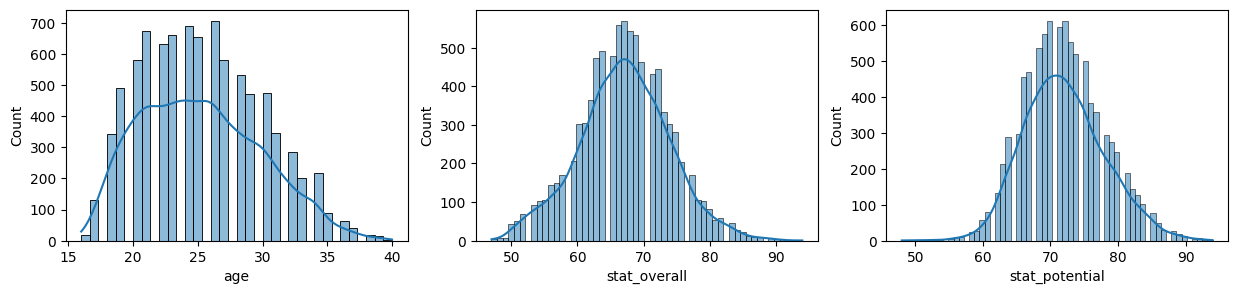

In [21]:
f, ax = plt.subplots(1,len(num_col),figsize=(15,3))
## 나이 히스토그램
sns.histplot(data = train,x='age',ax=ax[0],kde=True)
## 오버롤 히스토그램
sns.histplot(data = train,x='stat_overall',ax=ax[1],kde=True)
## 잠재력 히스토그램
sns.histplot(data = train,x='stat_potential',ax=ax[2],kde=True)



In [22]:
cat_col

['continent',
 'reputation',
 'contract_until',
 'position',
 'prefer_foot',
 'stat_skill_moves']

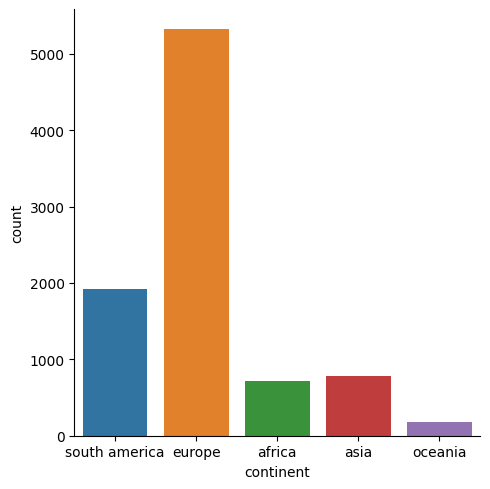

In [23]:

## 선수들의 출신 지역 
sns.catplot(data=train,x='continent',kind='count')
## 유럽이 제일 많고 그다음이 남미

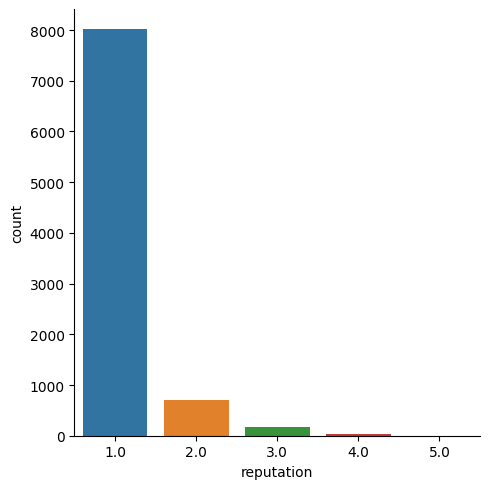

In [24]:

## 선수들의 평판 분포
sns.catplot(data=train,x='reputation',kind='count')
## 평판이 1인 선수들이 압도적으로 많다


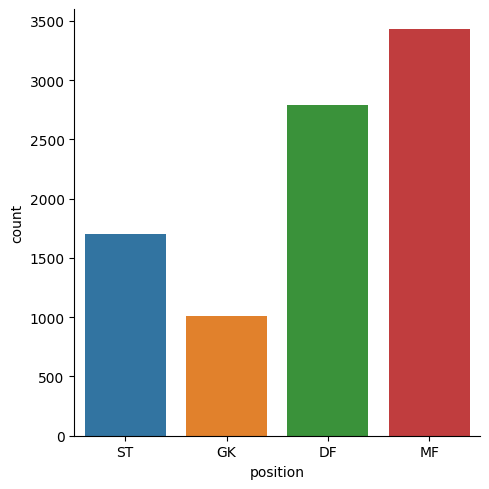

In [25]:

## 포지션 분포
sns.catplot(data=train,x='position',kind='count')

## 미드필더가 제일 많고 그다음은 수비수

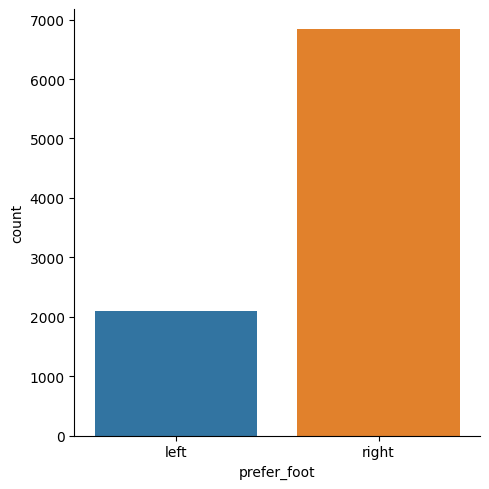

In [26]:

## 주발 선호
sns.catplot(data=train,x='prefer_foot',kind='count')
## 오른발잡이가 압도적으로 많다

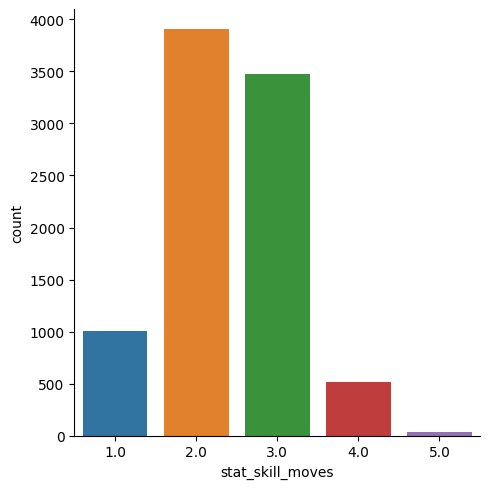

In [27]:

## 개인기 능력치
sns.catplot(data=train,x='stat_skill_moves',kind='count')

## 보통 2~3성이다 .

In [28]:
num_col

['age', 'stat_overall', 'stat_potential']

### 상관관계 확인

In [29]:
train.columns

Index(['age', 'continent', 'contract_until', 'position', 'prefer_foot',
       'reputation', 'stat_overall', 'stat_potential', 'stat_skill_moves',
       'value'],
      dtype='object')

In [30]:
corr_col = ['age','reputation','stat_overall','stat_potential','stat_skill_moves','value']

<Axes: >

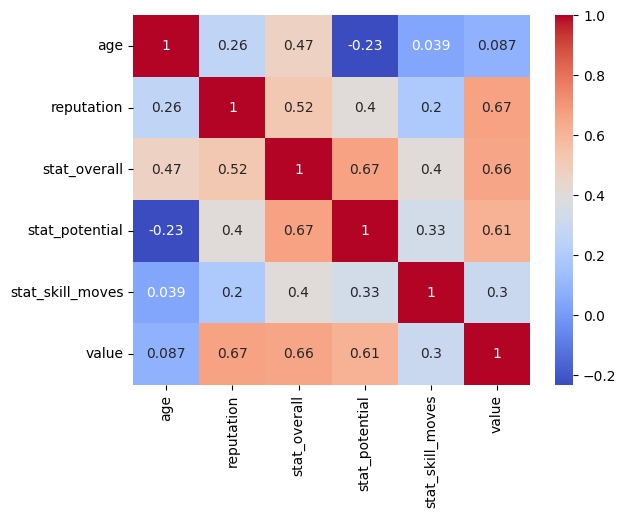

In [31]:
sns.heatmap(train.loc[:,corr_col].corr(),cmap='coolwarm',annot=True)

In [32]:
high_corr = ['reputation','stat_overall','stat_potential']
train.loc[:,corr_col].corr()


,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
age,1.000000,0.263468,0.467345,-0.231303,0.039362,0.087319
reputation,0.263468,1.000000,0.521389,0.399183,0.196582,0.665982
stat_overall,0.467345,0.521389,1.000000,0.665453,0.400164,0.658444
stat_potential,-0.231303,0.399183,0.665453,1.000000,0.332578,0.611907
stat_skill_moves,0.039362,0.196582,0.400164,0.332578,1.000000,0.298500
value,0.087319,0.665982,0.658444,0.611907,0.298500,1.000000


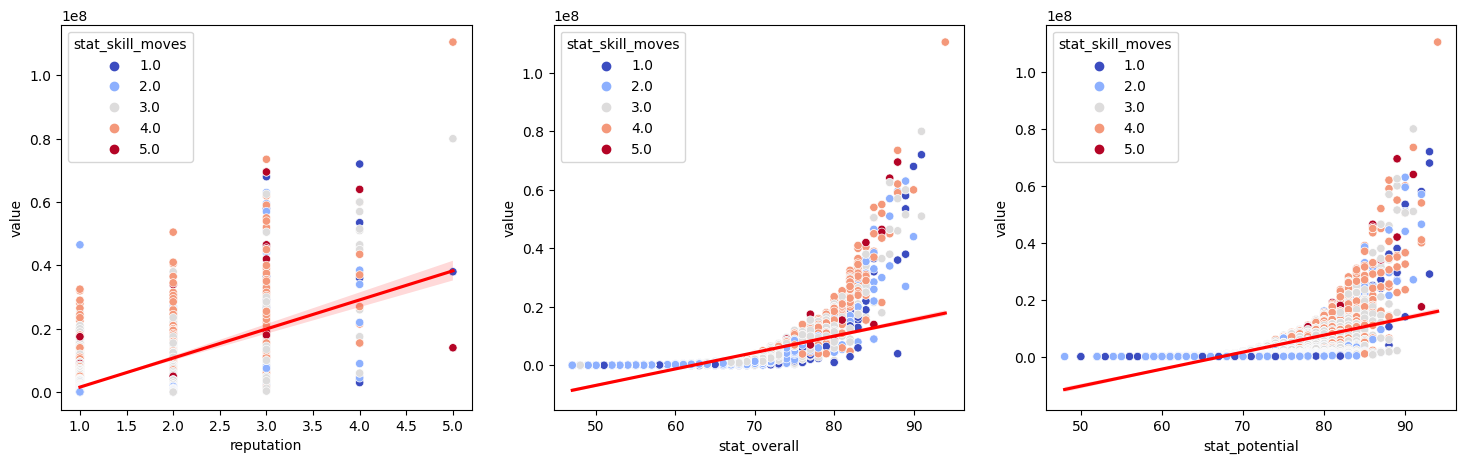

In [33]:
## 능력치와 평판, 잠재력에 따른 이적료 분포와 회귀선을 나타냄 (개인기 능력치에 따라)

f,ax = plt.subplots(1,len(high_corr),figsize=(18,5))

for col, ax in zip(high_corr,ax):
    sns.scatterplot(data=train,x=col,y='value',ax=ax,hue='stat_skill_moves',palette='coolwarm')
    sns.regplot(data=train,x=col,y='value',ax=ax,marker='',color='red')

plt.show()

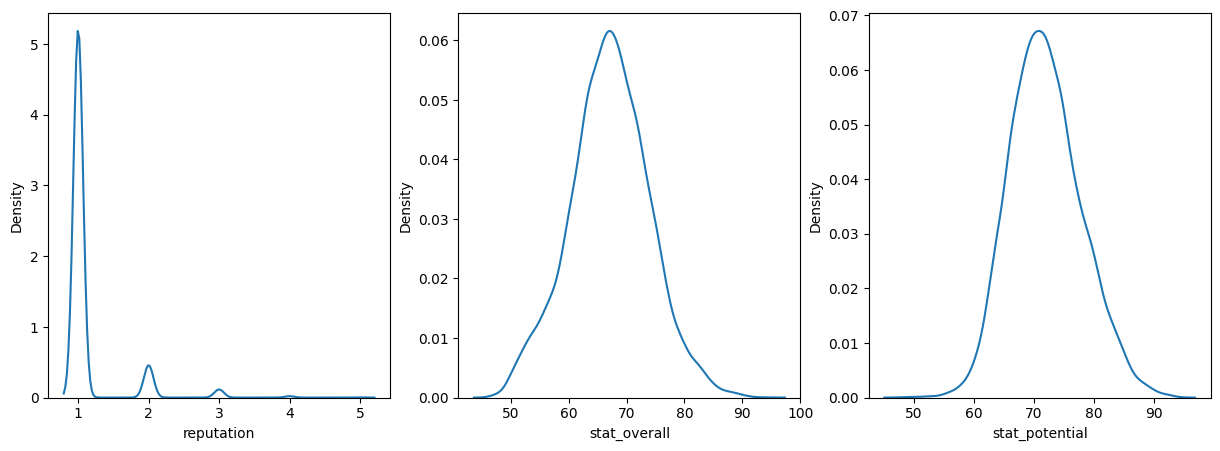

In [34]:
## 능력치와 평판, 잠재력의 밀도함수 그래스

f,ax = plt.subplots(1,len(high_corr),figsize=(15,5))

for col,ax in zip(high_corr,ax):
    sns.kdeplot(data=train,x=col,ax=ax)

In [35]:
train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


능력치 + 잠재력 달성한 비율을 파생변수로 만들어보기


In [36]:
train['ratio'] = train['stat_overall']/train['stat_potential']


In [37]:
num_col = ['age', 'stat_overall', 'stat_potential','ratio']

### 로그화 ㄱㄱ 

In [38]:
train['log_age'] = np.log1p(train.loc[:,'age'])
train['log_stat_overall'] = np.log1p(train.loc[:,'stat_overall'])
train['log_stat_potential'] = np.log1p(train.loc[:,'stat_potential'])
train['log_ratio'] = np.log1p(train.loc[:,'ratio'])
train['log_value'] = np.log1p(train['value'])



In [39]:
train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,ratio,log_age,log_stat_overall,log_stat_potential,log_ratio,log_value
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,1.000000,3.465736,4.553877,4.553877,0.693147,18.520526
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,0.978495,3.332205,4.521789,4.543295,0.682336,18.092177
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,1.000000,3.465736,4.521789,4.521789,0.693147,18.197537
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,1.000000,3.496508,4.521789,4.521789,0.693147,17.747336
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,0.967742,3.258097,4.510860,4.543295,0.676887,18.035018


<Axes: xlabel='age', ylabel='log_value'>

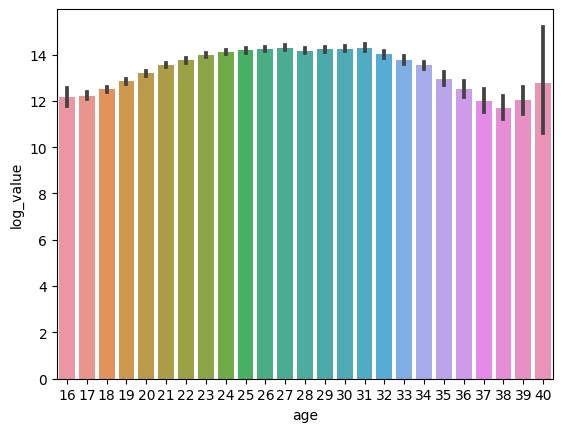

In [40]:
sns.barplot(x='age',y='log_value',data=train)

### 현재 오버롤, 잠재오버롤 


In [41]:
train.head()

,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,ratio,log_age,log_stat_overall,log_stat_potential,log_ratio,log_value
0,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0,1.000000,3.465736,4.553877,4.553877,0.693147,18.520526
1,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0,0.978495,3.332205,4.521789,4.543295,0.682336,18.092177
2,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0,1.000000,3.465736,4.521789,4.521789,0.693147,18.197537
3,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0,1.000000,3.496508,4.521789,4.521789,0.693147,17.747336
4,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0,0.967742,3.258097,4.510860,4.543295,0.676887,18.035018


In [46]:
import sys
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

stat_overall의 범위 :  47


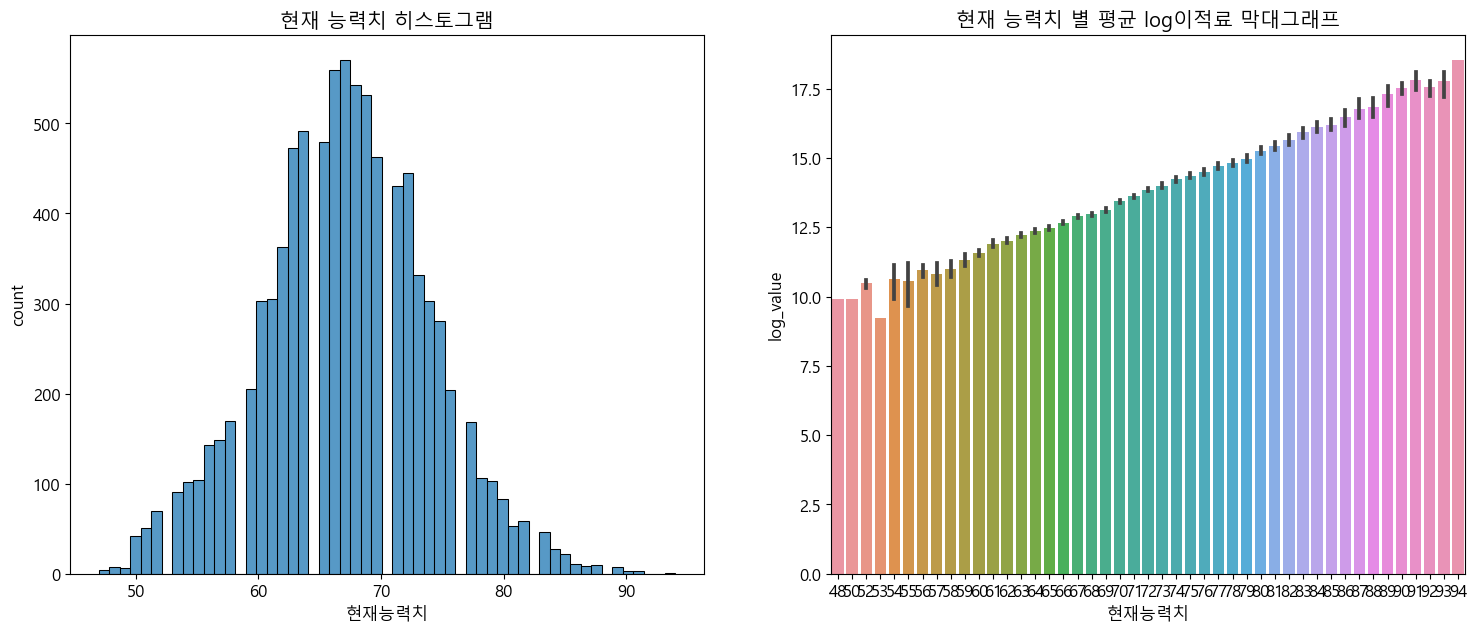

In [47]:
f , axes = plt.subplots(1,2)
axes = axes.flatten()
f.set_size_inches(18,7)

print("stat_overall의 범위 : " ,np.ptp(train["stat_overall"])) # 범위

# 히스토그램
sns.histplot(x="stat_overall", data=train, ax=axes[0])
axes[0].set(title = "현재 능력치 히스토그램",
      xlabel="현재능력치",
      ylabel="count")

sns.barplot(x="stat_potential", y="log_value", data=train,ax=axes[1])
axes[1].set(title = "현재 능력치 별 평균 log이적료 막대그래프",
      xlabel="현재능력치",
      ylabel="log_value")

plt.show()

stat_overall의 범위 :  46


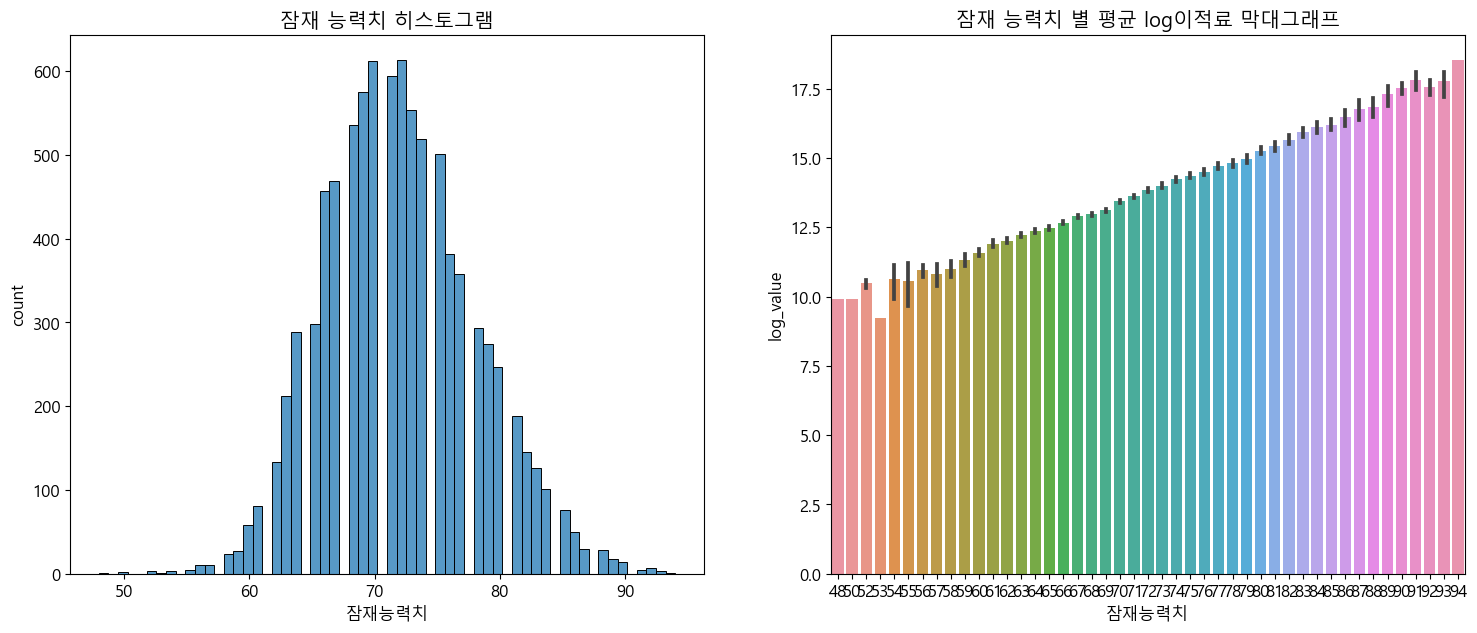

In [48]:
f , axes = plt.subplots(1,2)
axes = axes.flatten()
f.set_size_inches(18,7)

print("stat_overall의 범위 : " ,np.ptp(train["stat_potential"])) # 범위

# 히스토그램
sns.histplot(x="stat_potential", data=train, ax=axes[0])
axes[0].set(title = "잠재 능력치 히스토그램",
      xlabel="잠재능력치",
      ylabel="count")

sns.barplot(x="stat_potential", y="log_value", data=train,ax=axes[1])
axes[1].set(title = "잠재 능력치 별 평균 log이적료 막대그래프",
      xlabel="잠재능력치",
      ylabel="log_value")

plt.show()

stat_overall의 범위 :  0.3246753246753247


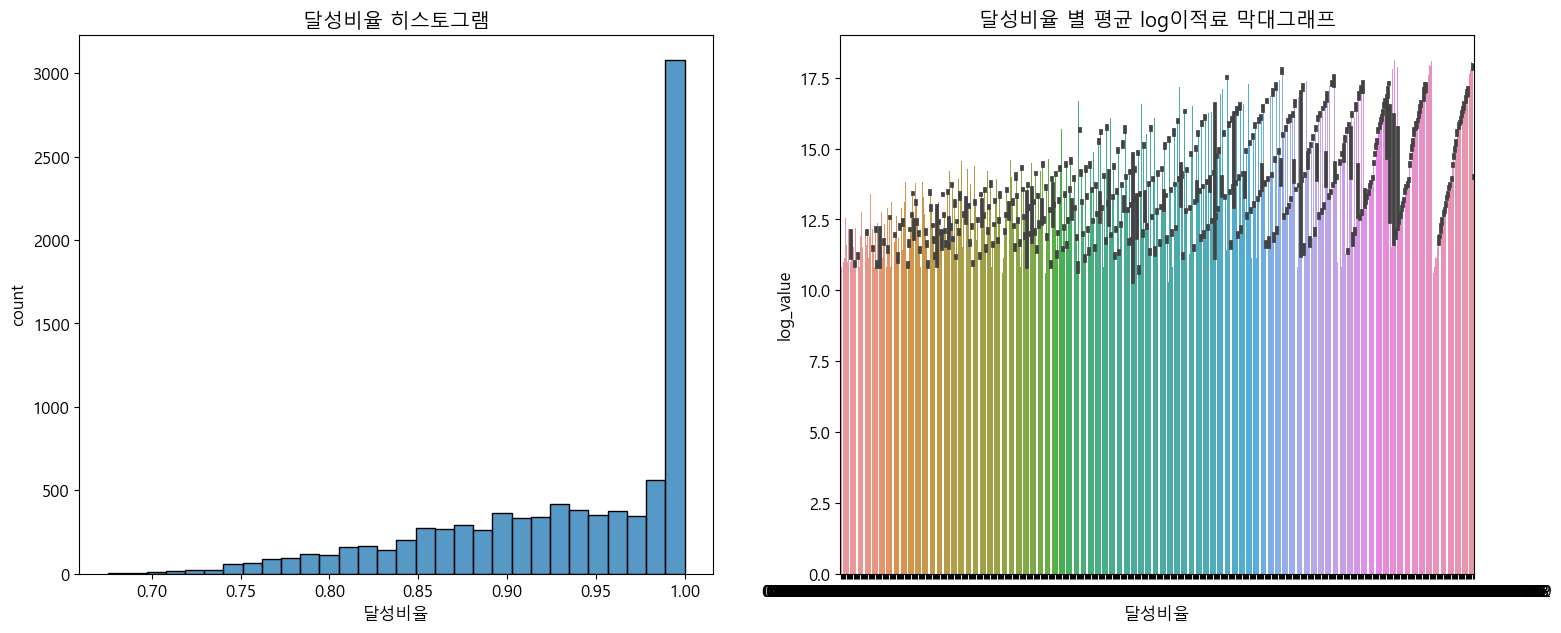

In [49]:
f , axes = plt.subplots(1,2)
axes = axes.flatten()
f.set_size_inches(18,7)

print("stat_overall의 범위 : " ,np.ptp(train["ratio"])) # 범위

# 히스토그램
sns.histplot(x="ratio", data=train, ax=axes[0])
axes[0].set(title = "달성비율 히스토그램",
      xlabel="달성비율",
      ylabel="count")

sns.barplot(x="ratio", y="log_value", data=train,ax=axes[1])
axes[1].set(title = "달성비율 별 평균 log이적료 막대그래프",
      xlabel="달성비율",
      ylabel="log_value")

plt.show()

In [55]:
train.loc[:,['age','log_age','log_stat_overall','stat_overall','stat_potential','log_stat_potential','log_ratio','ratio','value','log_value']].corr()

,age,log_age,log_stat_overall,stat_overall,stat_potential,log_stat_potential,log_ratio,ratio,value,log_value
age,1.000000,0.995082,0.478299,0.467345,-0.231303,-0.231568,0.862191,0.867525,0.087319,0.184635
log_age,0.995082,1.000000,0.504836,0.492412,-0.233217,-0.233393,0.897214,0.901576,0.102586,0.218620
log_stat_overall,0.478299,0.504836,1.000000,0.997311,0.649352,0.649121,0.616119,0.613936,0.615644,0.929395
stat_overall,0.467345,0.492412,0.997311,1.000000,0.665453,0.663204,0.598508,0.596732,0.658444,0.938548
stat_potential,-0.231303,-0.233217,0.649352,0.665453,1.000000,0.998325,-0.196939,-0.199026,0.611907,0.793474
log_stat_potential,-0.231568,-0.233393,0.649121,0.663204,0.998325,1.000000,-0.198961,-0.201031,0.585162,0.791274
log_ratio,0.862191,0.897214,0.616119,0.598508,-0.196939,-0.198961,1.000000,0.999796,0.188040,0.377350
ratio,0.867525,0.901576,0.613936,0.596732,-0.199026,-0.201031,0.999796,1.000000,0.187391,0.374553
value,0.087319,0.102586,0.615644,0.658444,0.611907,0.585162,0.188040,0.187391,1.000000,0.694398
log_value,0.184635,0.218620,0.929395,0.938548,0.793474,0.791274,0.377350,0.374553,0.694398,1.000000


In [54]:
## 종속변수는 value
## 연속형에서는 log_stat_overall, log_stat_potential

,id,value
0,1,0
1,2,0
2,4,0
3,5,0
4,6,0
